In [1]:
url = "https://plato.stanford.edu/contents.html"

In [2]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen
import requests
    
#open index page, store contents and close
uClient = urlopen(url)
page = uClient.read()
uClient.close()

#parse index page html
page_soup = soup(page, "html.parser")
    
#collect all text content in index page body
body = page_soup.body

#retrieve all entries, stored as keys in a dictionary
entries={}
for _ in body.find_all("a"):
    if str(_.get("href"))[:7]=="entries":
        entries[_.get("href")[8:-1]]=None

In [3]:
entry_url = url[:-13]+"entries/"+"logic-normative"+"/"

In [4]:
uClient = urlopen(entry_url)
entry_page = uClient.read()
uClient.close()

entry_soup = soup(entry_page, "html.parser")
entry_body = entry_soup.body

preamble = entry_body.find("div",{"id":"preamble"}).get_text(strip=True).replace("\n"," ")

In [5]:
items = list(entries.keys())

In [6]:
pr = []

for _ in items[:1000]:
    try:
        #adjust url for entry
        entry_url = url[:-13]+"entries/"+_+"/"

        #open, store, close entry page
        uClient = urlopen(entry_url)
        entry_page=uClient.read()
        uClient.close()

        #parse entry html
        entry_soup = soup(entry_page,"html.parser")
        entry_body = entry_soup.body

        #store content, add it as item to entry dict
        preamble = entry_body.find("div",{"id":"preamble"}).get_text(strip=True).replace("\n"," ")
          
        pr.append(preamble)
        
    except:
        pass

In [7]:
import pandas as pd

d = pd.DataFrame(dict(zip(items, pr)),index=[0]).T
d.reset_index(level=0, inplace=True)
d.columns=["Entries","Preamble"]

d

,Entries,Preamble
0,18thGerman-preKant,"In Germany, the eighteenth century was the age..."
1,abduction,"In the philosophical literature, the term “abd..."
2,abelard,Peter Abelard (1079–21 April 1142) [‘Abailard’...
3,abhidharma,The first centuries after Śākyamuni Buddha's d...
4,abilities,"In the accounts we give of one another, claims..."
5,abner-burgos,Abner of Burgos (Alfonso de Valladolid; c. 126...
6,abrabanel,"Judah Abrabanel (ca. 1465–after 1521), also kn..."
7,abraham-daud,Abraham ibn Daud (c.1110–1180) can be regarded...
8,abstract-objects,It is widely supposed that every entity falls ...
9,action,"If a person's head moves, she may or may not h..."


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer() 
csr_mat = tfidf.fit_transform(d.Preamble)
csr_array = csr_mat.toarray()

words = tfidf.get_feature_names()

In [9]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(n_components=50)

kmeans = KMeans(n_clusters=9)

pipeline = make_pipeline(svd,kmeans)

In [10]:
pipeline.fit(csr_array)

labels =pipeline.predict(csr_array)

df = pd.DataFrame({'label': labels, 'article': list(d.Entries)})

print(df.sort_values("label"))

                              article  label
525                       forgiveness      0
183                    causation-mani      0
653                       immigration      0
185             causation-metaphysics      0
186           causation-probabilistic      0
187                 causation-process      0
188                 cellular-automata      0
654                        immunology      0
190                   ceteris-paribus      0
655                      immutability      0
193                             chaos      0
194                         chemistry      0
196                          children      0
199                  chinese-legalism      0
657                       implicature      0
827                       logic-games      0
406                              envy      0
209                     church-turing      0
212                civil-disobedience      0
213                      civil-rights      0
216                           cloning      0
218       

In [11]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

scaler = MaxAbsScaler()

nmf = NMF(n_components= 20)

normalizer = Normalizer()

pipeline = make_pipeline(scaler,nmf,normalizer)

norm_features = pipeline.fit_transform(csr_mat)

In [13]:
df = pd.DataFrame(norm_features,index=list(d.Entries))

article = df.loc["friedrich-hayek"]

similarities = df.dot(article)

print (similarities.nlargest())

friedrich-hayek    1.000000
hume-aesthetics    0.990532
campanella         0.985627
david-lewis        0.983881
ficino             0.983536
dtype: float64


In [14]:
n_features = 1000
n_topics=9
n_top_words=10

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=n_features,stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(d['Preamble'])

In [15]:
nmf = NMF(n_components=n_topics, random_state=0,alpha=.1, l1_ratio=.5).fit(tfidf)

In [16]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print("Topics found via NMF:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topics found via NMF:

Topic #0:
philosophy philosophical century work philosopher early works writings thought history

Topic #1:
logic logics logical mathematics modal formal mathematical classical truth language

Topic #2:
moral theory human questions entry social section political philosophical sense

Topic #3:
feminist women gender social feminists feminism philosophy political sex perspectives

Topic #4:
science biology philosophy scientific mathematics experimental evolutionary sciences physics cognitive

Topic #5:
knowledge belief justification epistemology justified epistemic know skepticism beliefs true

Topic #6:
law legal natural obligations rule theory political theories rights private

Topic #7:
art aesthetics aesthetic beauty heidegger experience arts theory work criticism

Topic #8:
al arabic aristotle ibn jewish islamic greek avicenna works aristotelian



In [17]:
import numpy as np

nmf_embedding = nmf.transform(tfidf)
nmf_embedding = (nmf_embedding - nmf_embedding.mean(axis=0))/nmf_embedding.std(axis=0)

top_idx = np.argsort(nmf_embedding,axis=0)[-3:]

count = 0
for idxs in top_idx.T: 
    print("\nTopic {}:".format(count))
    for idx in idxs:
        print(d.iloc[idx]['Entries'])
    count += 1


Topic 0:
jaspers
ludwig-feuerbach
brentano

Topic 1:
logic-provability
logic-linear
logic-if

Topic 2:
moral-epistemology
libertarianism
cognitive-disability

Topic 3:
feminism-approaches
feminism-epistemology
feminism-femhist

Topic 4:
biology-experiment
duhem
thomas-kuhn

Topic 5:
self-knowledge
knowledge-analysis
knowledge-acquaindescrip

Topic 6:
legal-econanalysis
natural-law-theories
law-ideology

Topic 7:
digital-art
hegel-aesthetics
gadamer-aesthetics

Topic 8:
ibn-bajja
al-kindi
al-baghdadi


In [18]:
topics = ['psychological philosophy',
          'logic',
          'existence',
          'politics',
          'feminism',
          'knowledge',
          'law',
          'aesthetics',
          "morality",
         ]

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=3211)
tsne_embedding = tsne.fit_transform(nmf_embedding)
tsne_embedding = pd.DataFrame(tsne_embedding,columns=['x','y'])
tsne_embedding['hue'] = nmf_embedding.argmax(axis=1)

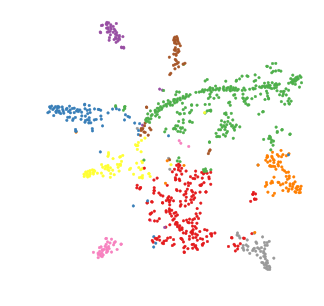

In [21]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

###code used to create the first plot for getting the colors 
plt.style.use('ggplot')

fig, axs = plt.subplots(1,1, figsize=(5, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.001)

legend_list = []

data = tsne_embedding
scatter = plt.scatter(data=data,x='x',y='y',s=6,c=data['hue'],cmap="Set1")
plt.axis('off')
plt.show()

colors = []
for i in range(len(topics)):
    idx = np.where(data['hue']==i)[0][0]
    color = scatter.get_facecolors()[idx]
    colors.append(color)
    legend_list.append(mpatches.Ellipse((0, 0), 1, 1, fc=color))

In [ ]:
colors